## Exercises: Data Visualizations in Python

We will be using [this dataset](https://www.kaggle.com/datasets/arnavvvvv/spotify-music/data) from Kaggle on Top Spotify Songs. No need to dowload it, it is already in the `exercises` directory.

### Setting Up Your Data

Before you dive into data visualizations, you need to set up your dataframe and make sure that it is cleaned and ready to go.

In [24]:
# Import all libraries and modules needed, then load and clean the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("./Popular_Spotify_Songs.csv", encoding='latin-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [25]:
# import and clean data
df.isna().sum()


track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [26]:
df["key"] = df["key"].fillna("C")

#I made this change because the key of C (a very common key for music) was
#entirely absent from the valuecounts for "key",and the number of null values (95)
#was a very plausible number for songs that would be in the key of C in this dataset.

df["in_shazam_charts"] = df["in_shazam_charts"].str.replace(',', '')
df["in_shazam_charts"] = df["in_shazam_charts"].fillna(df["in_shazam_charts"].median())
df["in_shazam_charts"] = df["in_shazam_charts"].astype(float)


#I filled in all the nulls in "in_shazam_charts" with the median value. To do that, I
#first had to change the data type from int to float; to do THAT, I had to strip
#commas (thousands-place markers) from that column.

In [27]:
df["artist_count"] = df["artist_count"].astype(float)

### Creating Visualizations

Now that the data is ready, you can use the dataset to create a number of different visualizations. You do not need to make the visualizations perfect; this is just for practice.

#### Line Chart

<AxesSubplot: xlabel='Dance%'>

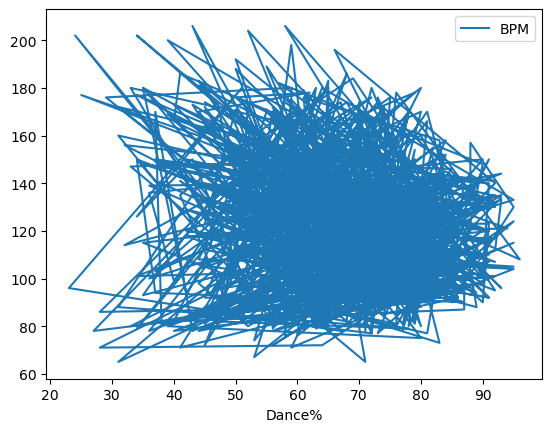

In [28]:
# Single line chart

bpm = df["bpm"]
dance = df["danceability_%"]

bpm_dance = pd.DataFrame({'Dance%':dance, 'BPM' : bpm})

bpm_dance.plot('Dance%', 'BPM')



In [29]:
# Multiple Line chart 



#### Bar Chart

<BarContainer object of 953 artists>

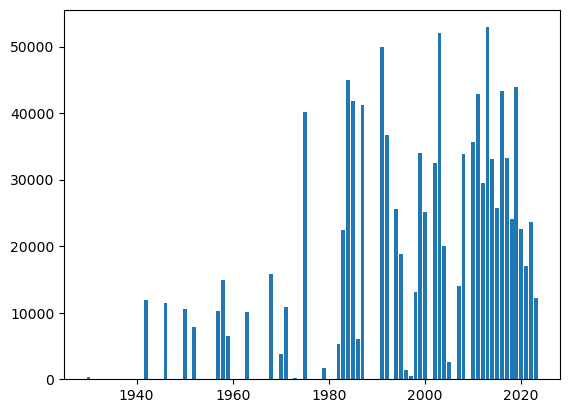

In [30]:
# Vertical bar chart

spotify=df["in_spotify_playlists"]
year=df["released_year"]
plt.bar(year, spotify)

<BarContainer object of 953 artists>

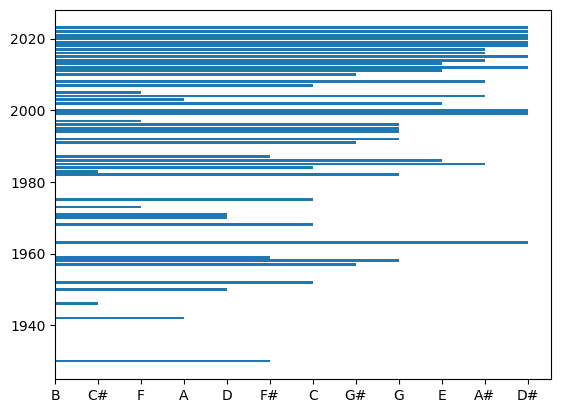

In [31]:
# Horizontal bar chart

key=df["key"]
year=df["released_year"]
plt.barh(year, key)


In [32]:
# Grouped bar chart


#### Scatter Plot

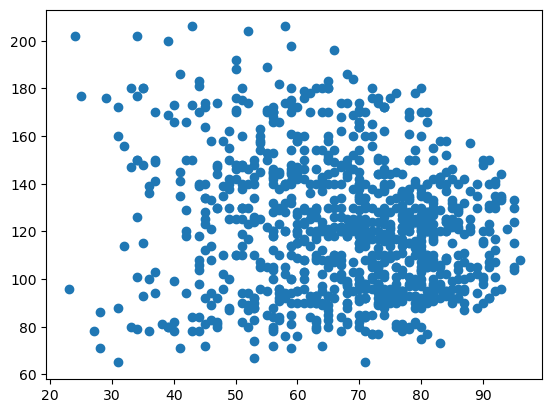

In [33]:
# scatter plot

bpm=df["bpm"]
dance=df["danceability_%"]
plt.scatter(dance, bpm)


#### Histogram

(array([ 81., 120.,  89.,  75.,  81.,  73.,  95.,  91.,  96.,  62.,  57.,
         33.]),
 array([ 0.        ,  0.91666667,  1.83333333,  2.75      ,  3.66666667,
         4.58333333,  5.5       ,  6.41666667,  7.33333333,  8.25      ,
         9.16666667, 10.08333333, 11.        ]),
 <BarContainer object of 12 artists>)

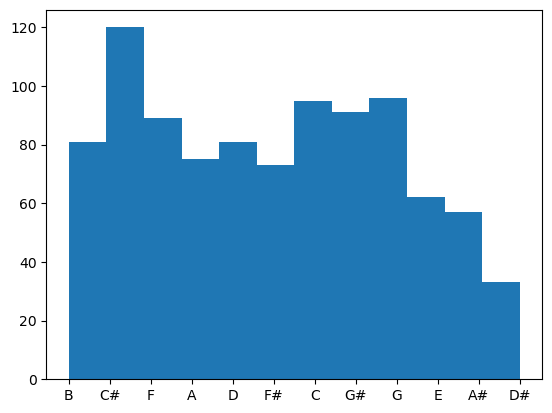

In [34]:
# histogram

plt.hist(key, bins=12)

#### Pie Chart

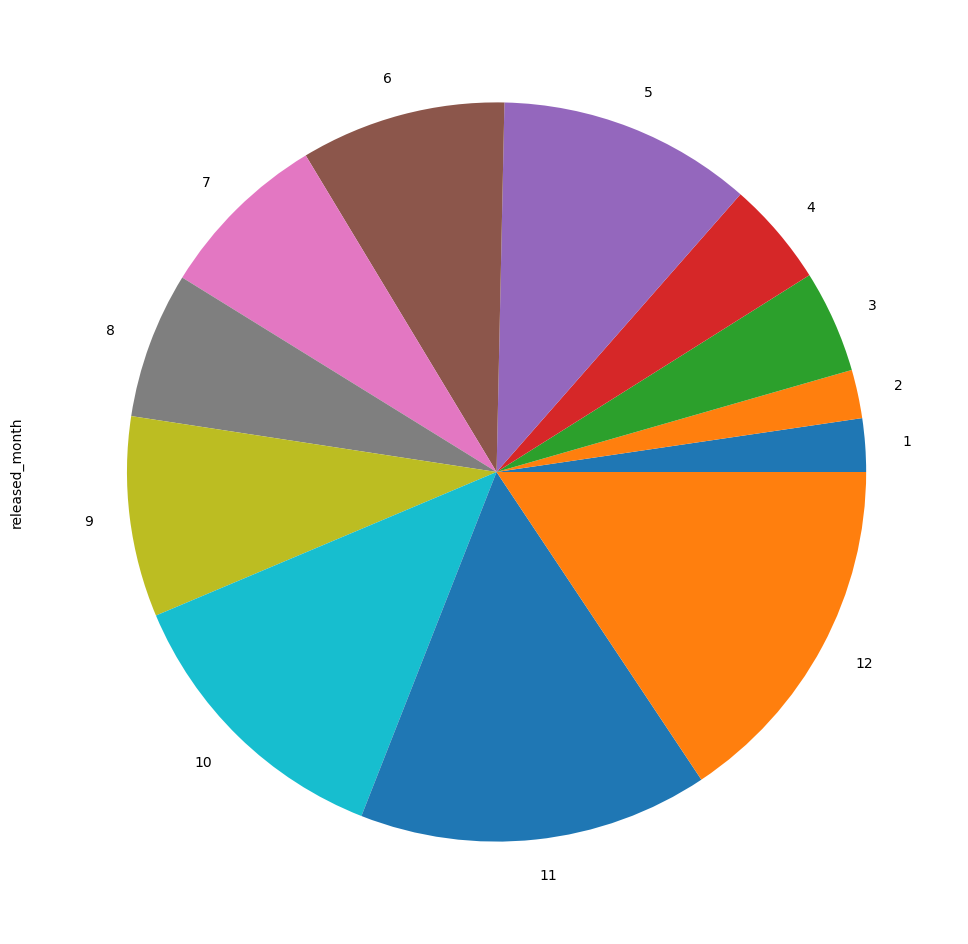

In [35]:
# pie chart

plot = df["released_month"].groupby(df["released_month"]).sum().plot.pie(subplots=True, figsize=(12,12))